In [11]:
!pip install tensorflow opencv-python matplotlib scikit-learn

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
# Set dataset directories
train_dir = r'D:\ML DATASETS\plant disease recognition\Train\Train'
val_dir =  r'D:\ML DATASETS\plant disease recognition\validation\validation'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [14]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # If you have only train data, create a split
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1059 images belonging to 3 classes.
Found 263 images belonging to 3 classes.


In [15]:
# Use MobileNetV2 as feature extractor
base = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base.trainable = False  # Freeze base

model = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
EPOCHS = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.6364 - loss: 0.8168 - val_accuracy: 0.9011 - val_loss: 0.3455
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 0.8669 - loss: 0.3519 - val_accuracy: 0.9544 - val_loss: 0.2204
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.9254 - loss: 0.2434 - val_accuracy: 0.9582 - val_loss: 0.1865
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 175s 5s/step - accuracy: 0.9301 - loss: 0.2063 - val_accuracy: 0.9506 - val_loss: 0.1515
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 262s 8s/step - accuracy: 0.9509 - loss: 0.1720 - val_accuracy: 0.9544 - val_loss: 0.1408
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 283s 8s/step - accuracy: 0.9537 - loss: 0.1635 - val_accuracy: 0.9734 - val_loss: 0.1321
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 241s 6s/step - accuracy: 0.9481 - loss: 0.1571 - val_accuracy: 0.9696 - val_loss: 0.0994
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.9575 - loss: 0.1454 - val_accuracy: 0.9734 - val

In [17]:
# Evaluate on validation set
val_generator.reset()
Y_pred = model.predict(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report:')
target_names = list(val_generator.class_indices.keys())
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.39      0.40      0.39        91
     Powdery       0.36      0.36      0.36        86
        Rust       0.31      0.30      0.30        86

    accuracy                           0.35       263
   macro avg       0.35      0.35      0.35       263
weighted avg       0.35      0.35      0.35       263



In [21]:
import os
from tensorflow.keras.preprocessing import image

folder_path = r'D:\ML DATASETS\plant disease recognition\Train\Train\Healthy'  # Set your folder

# 1. List Images (define variable before use)
images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

IMG_SIZE = (224, 224)
results = []

# 2. Loop over images
for img_name in images:
    img_path = os.path.join(folder_path, img_name)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0
    pred = model.predict(x)
    class_idx = np.argmax(pred)
    class_label = list(train_generator.class_indices.keys())[class_idx]
    results.append((img_name, class_label))

# 3. Print results
for fname, label in results:
    print(f'{fname}: {label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━

In [22]:
train_dir = r'D:\ML DATASETS\plant disease recognition\Train\Train'  # parent folder containing all class folders

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1059 images belonging to 3 classes.
Found 263 images belonging to 3 classes.


In [23]:
print(train_generator.class_indices)


{'Healthy': 0, 'Powdery': 1, 'Rust': 2}


In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Create model (here: MobileNetV2 transfer learning)
base = MobileNetV2(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
base.trainable = False

model = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# *** THIS IS TRAINING ***
EPOCHS = 10                      # You can increase for better accuracy
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.6166 - loss: 0.8699 - val_accuracy: 0.8783 - val_loss: 0.3593
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.8735 - loss: 0.3611 - val_accuracy: 0.9202 - val_loss: 0.2508
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9056 - loss: 0.2660 - val_accuracy: 0.9468 - val_loss: 0.1843
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9396 - loss: 0.2000 - val_accuracy: 0.9468 - val_loss: 0.1688
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.9358 - loss: 0.1984 - val_accuracy: 0.9658 - val_loss: 0.1433
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.9528 - loss: 0.1634 - val_accuracy: 0.9582 - val_loss: 0.1336
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.9547 - loss: 0.1495 - val_accuracy: 0.9582 - val_loss: 0.1379
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.9566 - loss: 0.1363 - val_accuracy: 0.9696 - v

In [25]:
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9696 - loss: 0.1051
Validation Loss: 0.10513658076524734
Validation Accuracy: 0.9695817232131958


In [26]:
import os
from tensorflow.keras.preprocessing import image

test_folder = r'D:\ML DATASETS\plant disease recognition\Train\Train\Rust'  # example folder

IMG_SIZE = (224, 224)
sample_images = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

for img_name in sample_images:
    img_path = os.path.join(test_folder, img_name)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0
    pred = model.predict(x)
    label = list(train_generator.class_indices.keys())[np.argmax(pred)]
    print(f'{img_name}: {label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
807947b90eb77856.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
80933fcc6a673636.jpg: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
80f09587dfc7988e.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
8161733dfc3c1c65.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
81a063b69c99ed9e.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
81b4639b9c72790f.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
81c97ef498cc87c3.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
81cd969c7d0944fb.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
81d0d0c77d4762cf.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
81d5c3709f4e314f.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
81dd8ff118a370c7.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
81f5730f2b1c3731.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
82798f32ab063ecd.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
82a51a4b035f35fe.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
82aa92f365da31f2.jpg: Rust
1/1 ━━━━━━━━━━━━━━━━━━━━

In [29]:
import keras
keras.saving.save_model(model, 'plant_disease_model.keras')


In [30]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

val_generator.reset()
Y_pred = model.predict(val_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report:')
print(classification_report(val_generator.classes, y_pred, target_names=list(train_generator.class_indices.keys())))
print('Confusion Matrix:')
print(confusion_matrix(val_generator.classes, y_pred))


9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.33      0.33      0.33        91
     Powdery       0.29      0.29      0.29        86
        Rust       0.30      0.30      0.30        86

    accuracy                           0.31       263
   macro avg       0.31      0.31      0.31       263
weighted avg       0.31      0.31      0.31       263

Confusion Matrix:
[[30 31 30]
 [30 25 31]
 [30 30 26]]


In [32]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


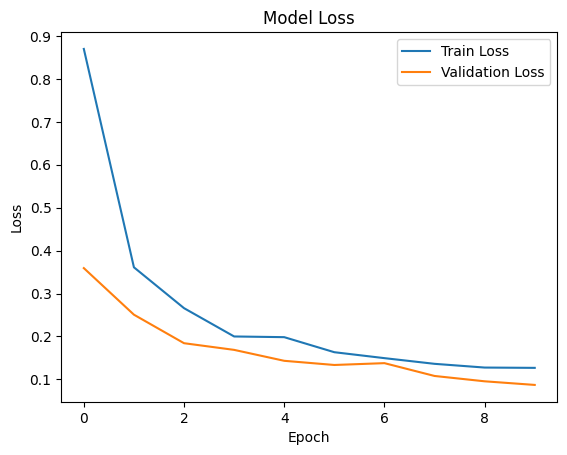

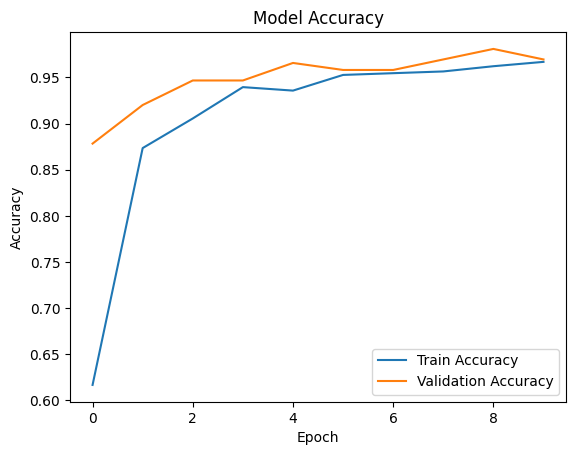

In [36]:
import matplotlib.pyplot as plt

# Loss plot
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_curve.png')  # Save the plot

# Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_curve.png')  # Save the plot

plt.show()
